In [1]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd

In [4]:
print(yf)

<module 'yfinance' from '/usr/local/lib/python3.7/dist-packages/yfinance/__init__.py'>


samsung 데이터 확인 \
데이터 형식 : pandas Dataframe

In [89]:
df_price = yf.download('005930.KS', start='1985-01-04', end='2020-01-07', progress=False)
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2000-01-04 to 2020-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [90]:
df_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,19780.129096,19987.817279,19568.432969,19780.806356,16273.781915,2.207492e+07
std,13624.639751,13738.644747,13502.098630,13621.824091,12226.174363,1.597614e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,2051.707520,0.000000e+00
25%,9500.000000,9635.000000,9380.000000,9515.000000,7224.817627,1.157920e+07
50%,14900.000000,15040.000000,14680.000000,14880.000000,11653.909180,1.787500e+07
75%,26960.000000,27130.000000,26640.000000,26900.000000,21937.523438,2.789948e+07
max,57500.000000,57520.000000,56760.000000,57220.000000,52093.160156,1.642150e+08


In [91]:
df_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915527,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.598145,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661621,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537109,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000
...,...,...,...,...,...,...
2019-12-27,55700.0,56900.0,55500.0,56500.0,52093.160156,12313056
2019-12-30,56200.0,56600.0,55700.0,55800.0,51447.757812,8356767
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.550781,12993228


Text(0, 0.5, 'price')

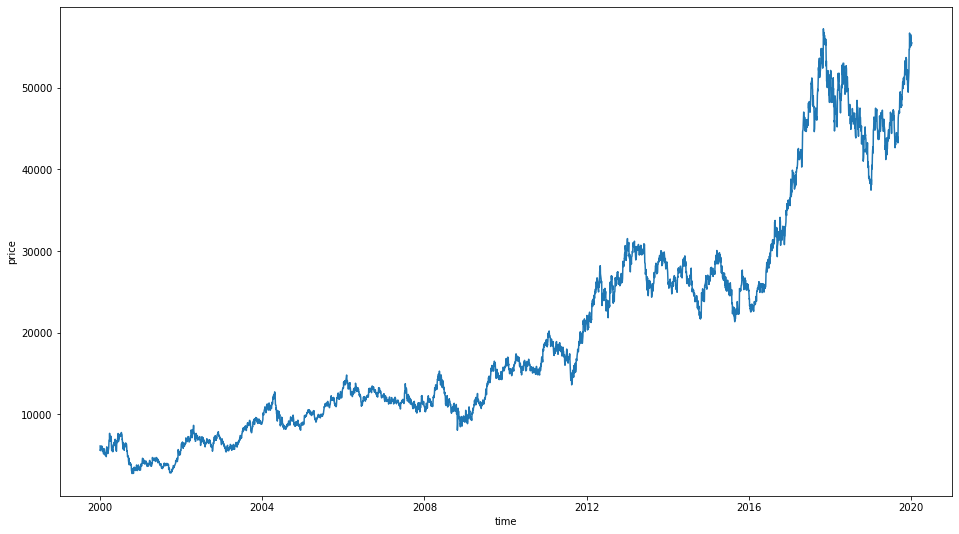

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
sns.lineplot(y=df_price['Close'], x=df_price.index) # .index => 인덱스 부분이 "Date"이기 때문
plt.xlabel('time')
plt.ylabel('price')

시각화를 위해 일자를 날짜형으로 변환한다.

In [93]:
df_price['Date'] = pd.to_datetime(df_price.index, format='%Y%m%d')
df_price['Year'] = df_price.index.year
df_price['Month'] = df_price.index.month
df_price['Day'] = df_price.index.day

In [94]:
df_price

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month,Day
Date,,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915527,74195000,2000-01-04,2000,1,4
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.598145,74680000,2000-01-05,2000,1,5
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.661621,54390000,2000-01-06,2000,1,6
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.537109,40305000,2000-01-07,2000,1,7
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.392578,46880000,2000-01-10,2000,1,10
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,55700.0,56900.0,55500.0,56500.0,52093.160156,12313056,2019-12-27,2019,12,27
2019-12-30,56200.0,56600.0,55700.0,55800.0,51447.757812,8356767,2019-12-30,2019,12,30
2020-01-02,55500.0,56000.0,55000.0,55200.0,50894.550781,12993228,2020-01-02,2020,1,2


sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalize 해 주도록 하겠습니다.

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df_price[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

          Open      High       Low     Close    Volume
0     0.062955  0.061176  0.059625  0.062030  0.451816
1     0.059316  0.060263  0.057048  0.052303  0.454770
2     0.058406  0.055150  0.058152  0.053037  0.331212
3     0.054949  0.053141  0.054104  0.051569  0.245440
4     0.055677  0.054967  0.058152  0.055790  0.285479
...        ...       ...       ...       ...       ...
5030  0.967249  0.988678  0.976813  0.986787  0.074981
5031  0.976346  0.983199  0.980493  0.973940  0.050889
5032  0.963610  0.972243  0.967611  0.962929  0.079123
5033  0.972707  0.983199  0.965771  0.968435  0.093915
5034  0.952693  0.964938  0.960250  0.968435  0.062594

[5035 rows x 5 columns]


In [96]:
TEST_SIZE = 200

In [97]:
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

##Dataset을 만들어 주는 함수
window_size는 내가 얼마동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter 입니다. 즉 내가 과거 20일을 기반으로 내일 데이터를 예측한다라고 가정했을 때는 window_size=20이 됩니다.


In [98]:
def make_dataset(data, label, window_size = 20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [99]:
feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

test_feature = test[feature_cols]
test_label = test[label_cols]

In [100]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

In [101]:
x_train.shape, x_valid.shape
# ((6086, 20, 4), (1522, 20, 4))

((3852, 20, 4), (963, 20, 4))

In [102]:
# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
# ((180, 20, 4), (180, 1))

((180, 20, 4), (180, 1))

In [103]:
train_feature.shape

(4815, 20, 4)

#Keras를 활용한 LSTM 모델 생성
모델은 매우 간단한 모델을 적용하였습니다. 이미 우리의 feature 데이터의 복잡도가 그렇게 크지 않고 학습해야할 데이터도 10,000개 이하 수준이기 때문에 아주 단순한 모델로도 충분히 좋은 성능을 기대해 볼 수 있습니다. 오히려 너무 복잡한 모델이 과적합을 유발하고, 학습도 잘 되지 못하는 결과를 낳을 수 있습니다.

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(16, 
      input_shape=(train_feature.shape[1], train_feature.shape[2]), 
      activation='relu', 
      return_sequences=False)
          )
model.add(Dense(1))

모델의 학습

In [112]:
import os
model_path = os.getcwd()

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
240/241 [============================>.] - ETA: 0s - loss: 0.0024
Epoch 1: val_loss improved from inf to 0.00029, saving model to /content/tmp_checkpoint.h5
241/241 [==============================] - 4s 9ms/step - loss: 0.0024 - val_loss: 2.9080e-04
Epoch 2/200
234/241 [============================>.] - ETA: 0s - loss: 2.6433e-04
Epoch 2: val_loss improved from 0.00029 to 0.00024, saving model to /content/tmp_checkpoint.h5
241/241 [==============================] - 2s 8ms/step - loss: 2.6280e-04 - val_loss: 2.3645e-04
Epoch 3/200
237/241 [============================>.] - ETA: 0s - loss: 2.1785e-04
Epoch 3: val_loss improved from 0.00024 to 0.00019, saving model to /content/tmp_checkpoint.h5
241/241 [==============================] - 2s 8ms/step - loss: 2.1802e-04 - val_loss: 1.8930e-04
Epoch 4/200
238/241 [============================>.] - ETA: 0s - loss: 1.9244e-04
Epoch 4: val_loss did not improve from 0.00019
241/241 [==============================] - 2s 8ms/step - loss

In [113]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

6/6 [==============================] - 0s 3ms/step


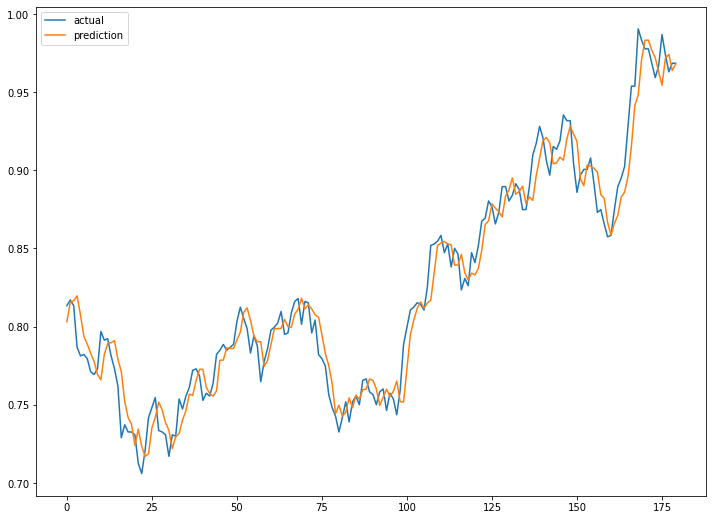

In [114]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()